In [10]:
"""
Module 2: Exploratory Data Analysis (EDA) and Structuring Video Metadata
YouTube Semantic Search Project
"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("="*60)
print("MODULE 2: EXPLORATORY DATA ANALYSIS")
print("="*60)

MODULE 2: EXPLORATORY DATA ANALYSIS


In [11]:
print("\n[STEP 1] Loading CSV data...")

# Load your CSV file
df = pd.read_csv('C:\\projects\\NEW AI QUERY TUBE\\AI-QueryTube\\data\\raw\\youtube_metadata.csv')  # ← REPLACE WITH YOUR FILENAME

print(f"✓ Data loaded successfully!")
print(f"  Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"\nColumn names: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
display(df.head())


[STEP 1] Loading CSV data...
✓ Data loaded successfully!
  Shape: 168 rows × 3 columns

Column names: ['video_id', 'title', 'published_date']

First 5 rows:


,video_id,title,published_date
0,fPopFeqw5sk,Learn NumPy data types in 8 minutes! 💱,2025-11-21T15:40:45Z
1,xf71dRBRP6o,Build a music player with Python! 🎶,2025-11-20T16:51:00Z
2,k0D3MQwLn7A,Learn Python iterators in 7 minutes! ➡️,2025-11-10T14:21:48Z
3,ZBlxaXMN_hU,Learn Python generator expressions in 9 minute...,2025-11-07T15:08:16Z
4,c9vhHUGdav0,Learn Matplotlib in 1 hour! 📊,2025-10-09T14:01:03Z


In [12]:
print("\n" + "="*60)
print("[STEP 2] Inspecting Data Types")
print("="*60)

print("\nCurrent data types:")
print(df.dtypes)

# Convert published_date to datetime
df['published_date'] = pd.to_datetime(df['published_date'])
print("\n✓ Converted 'published_date' to datetime format")

# Extract additional time features for analysis
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['year_month'] = df['published_date'].dt.to_period('M')
df['day_of_week'] = df['published_date'].dt.day_name()

print("✓ Extracted temporal features: year, month, year_month, day_of_week")

print("\n" + "="*60)
print("[STEP 3] Basic Data Overview")
print("="*60)

print(f"\nDataset Info:")
print(f"  Total videos: {len(df)}")
print(f"  Date range: {df['published_date'].min().date()} to {df['published_date'].max().date()}")
print(f"  Time span: {(df['published_date'].max() - df['published_date'].min()).days} days")


[STEP 2] Inspecting Data Types

Current data types:
video_id          object
title             object
published_date    object
dtype: object

✓ Converted 'published_date' to datetime format
✓ Extracted temporal features: year, month, year_month, day_of_week

[STEP 3] Basic Data Overview

Dataset Info:
  Total videos: 168
  Date range: 2021-08-13 to 2025-11-21
  Time span: 1561 days


C:\Users\adity\AppData\Local\Temp\ipykernel_35272\2959197817.py:15: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['year_month'] = df['published_date'].dt.to_period('M')



[STEP 4] Missing Values Analysis

Missing Values Summary:


,Column,Missing_Count,Missing_Percentage
video_id,video_id,0,0.0
title,title,0,0.0
published_date,published_date,0,0.0
year,year,0,0.0
month,month,0,0.0
year_month,year_month,0,0.0
day_of_week,day_of_week,0,0.0



✓ NO MISSING VALUES - Dataset is complete!
✓ Saved: 01_missing_values.png


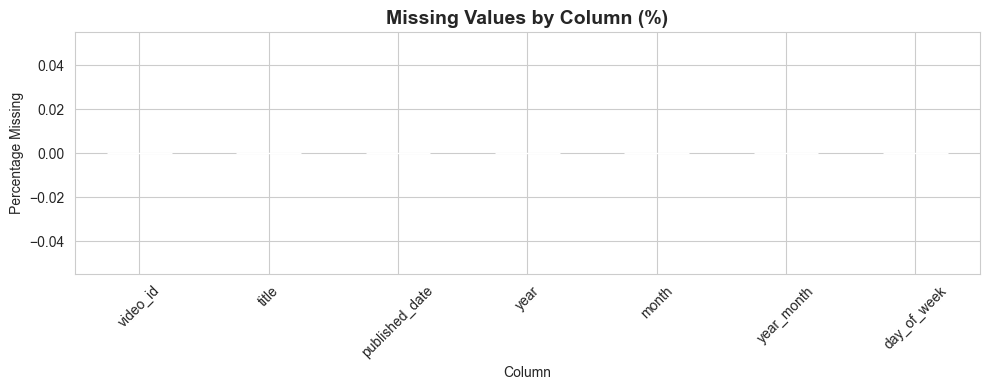

In [13]:
print("\n" + "="*60)
print("[STEP 4] Missing Values Analysis")
print("="*60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).round(2)
})

print("\nMissing Values Summary:")
display(missing_data)

if df.isnull().sum().sum() == 0:
    print("\n✓ NO MISSING VALUES - Dataset is complete!")
else:
    print(f"\n⚠ Found {df.isnull().sum().sum()} missing values across dataset")

# Visualize missing data
plt.figure(figsize=(10, 4))
missing_data.set_index('Column')['Missing_Percentage'].plot(kind='bar', color='salmon')
plt.title('Missing Values by Column (%)', fontsize=14, fontweight='bold')
plt.ylabel('Percentage Missing')
plt.xlabel('Column')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('01_missing_values.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 01_missing_values.png")
plt.show()

In [14]:
print("\n" + "="*60)
print("[STEP 5] Row and Column Uniqueness Analysis")
print("="*60)

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nDuplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print(f"⚠ Found {duplicate_rows} duplicate rows - consider removing them")
    print("\nDuplicate row examples:")
    display(df[df.duplicated(keep=False)].head())
else:
    print("✓ No duplicate rows found")

# Uniqueness by column
print("\n" + "-"*60)
print("Column Uniqueness:")
print("-"*60)

uniqueness_stats = pd.DataFrame({
    'Column': ['video_id', 'title', 'published_date'],
    'Total_Values': [len(df)] * 3,
    'Unique_Values': [df['video_id'].nunique(), df['title'].nunique(), df['published_date'].nunique()],
    'Duplicate_Count': [len(df) - df['video_id'].nunique(), 
                        len(df) - df['title'].nunique(), 
                        len(df) - df['published_date'].nunique()]
})
uniqueness_stats['Uniqueness_%'] = (uniqueness_stats['Unique_Values'] / uniqueness_stats['Total_Values'] * 100).round(2)

display(uniqueness_stats)

# Check video_id uniqueness (should be 100%)
if df['video_id'].nunique() == len(df):
    print("\n✓ All video_ids are UNIQUE (as expected)")
else:
    print(f"\n⚠ WARNING: {len(df) - df['video_id'].nunique()} duplicate video_ids found!")
    print("  Duplicate video_ids:")
    display(df[df.duplicated(subset=['video_id'], keep=False)][['video_id', 'title']])

# Check title uniqueness
duplicate_titles = len(df) - df['title'].nunique()
if duplicate_titles > 0:
    print(f"\n⚠ Found {duplicate_titles} videos with duplicate titles")
    print("  Sample duplicate titles:")
    title_counts = df['title'].value_counts()
    display(title_counts[title_counts > 1].head())
else:
    print("\n✓ All titles are unique")


[STEP 5] Row and Column Uniqueness Analysis

Duplicate rows: 0
✓ No duplicate rows found

------------------------------------------------------------
Column Uniqueness:
------------------------------------------------------------


,Column,Total_Values,Unique_Values,Duplicate_Count,Uniqueness_%
0,video_id,168,168,0,100.0
1,title,168,168,0,100.0
2,published_date,168,168,0,100.0



✓ All video_ids are UNIQUE (as expected)

✓ All titles are unique



[STEP 6] Title Distribution Analysis

Title Length Statistics:


count    168.000000
mean      36.327381
std       10.249286
min       13.000000
25%       30.000000
50%       35.500000
75%       43.000000
max       75.000000
Name: title_length, dtype: float64


Word Count Statistics:


count    168.000000
mean       6.636905
std        1.650351
min        2.000000
25%        5.000000
50%        7.000000
75%        8.000000
max       11.000000
Name: word_count, dtype: float64

✓ Saved: 02_title_distribution.png


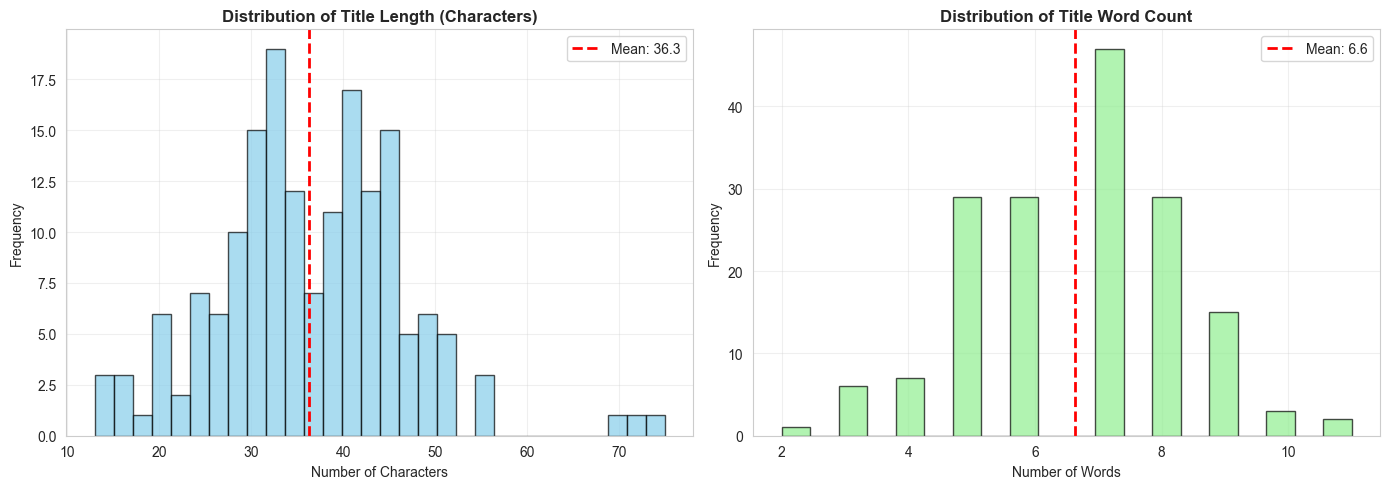


Title Extremes:

Longest title (75 chars):
  Convert decimal to hexadecimal EASY!  #coding #programming #computerscience

Shortest title (13 chars):
  MySQL: ROLLUP


In [15]:
print("\n" + "="*60)
print("[STEP 6] Title Distribution Analysis")
print("="*60)

# Title length analysis
df['title_length'] = df['title'].str.len()
df['word_count'] = df['title'].str.split().str.len()

print("\nTitle Length Statistics:")
display(df['title_length'].describe())

print("\nWord Count Statistics:")
display(df['word_count'].describe())

# Visualize title length distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Character length distribution
axes[0].hist(df['title_length'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].axvline(df['title_length'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["title_length"].mean():.1f}')
axes[0].set_title('Distribution of Title Length (Characters)', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Number of Characters')
axes[0].set_ylabel('Frequency')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Word count distribution
axes[1].hist(df['word_count'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
axes[1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.1f}')
axes[1].set_title('Distribution of Title Word Count', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Number of Words')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('02_title_distribution.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 02_title_distribution.png")
plt.show()

# Find longest and shortest titles
print("\nTitle Extremes:")
print(f"\nLongest title ({df['title_length'].max()} chars):")
print(f"  {df.loc[df['title_length'].idxmax(), 'title']}")
print(f"\nShortest title ({df['title_length'].min()} chars):")
print(f"  {df.loc[df['title_length'].idxmin(), 'title']}")


[STEP 7] Publish Frequency Over Time

Videos per Year:


,year,video_count
0,2021,29
1,2022,25
2,2023,35
3,2024,56
4,2025,23



Total months with uploads: 28
Average videos per month: 6.00
Most productive month: 2024-12 (19 videos)

✓ Saved: 03_publish_frequency.png


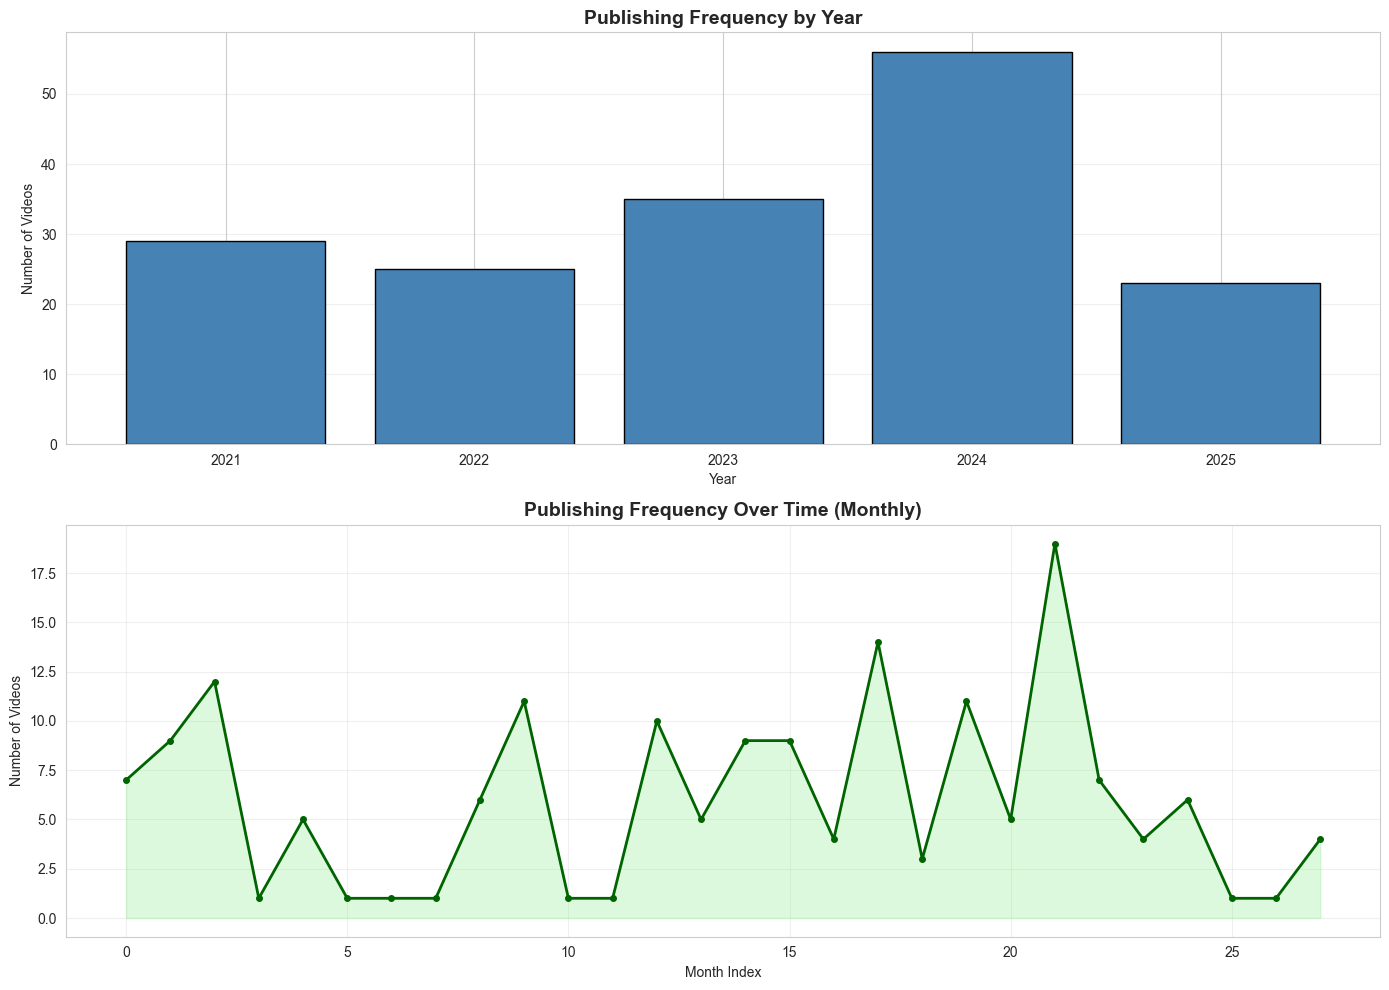

In [ ]:
print("\n" + "="*60)
print("[STEP 7] Publish Frequency Over Time")
print("="*60)

# Videos per year
videos_per_year = df.groupby('year').size().reset_index(name='video_count')
print("\nVideos per Year:")
display(videos_per_year)

# Videos per month (aggregated)
videos_per_month = df.groupby('year_month').size().reset_index(name='video_count')
videos_per_month['year_month'] = videos_per_month['year_month'].astype(str)

print(f"\nTotal months with uploads: {len(videos_per_month)}")
print(f"Average videos per month: {videos_per_month['video_count'].mean():.2f}")
print(f"Most productive month: {videos_per_month.loc[videos_per_month['video_count'].idxmax(), 'year_month']} ({videos_per_month['video_count'].max()} videos)")

# Visualize publishing frequency
fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Yearly trend
axes[0].bar(videos_per_year['year'], videos_per_year['video_count'], color='steelblue', edgecolor='black')
axes[0].set_title('Publishing Frequency by Year', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Number of Videos')
axes[0].grid(True, alpha=0.3, axis='y')

# Monthly trend (time series)
axes[1].plot(range(len(videos_per_month)), videos_per_month['video_count'], 
             marker='o', color='darkgreen', linewidth=2, markersize=4)
axes[1].set_title('Publishing Frequency Over Time (Monthly)', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Month Index')
axes[1].set_ylabel('Number of Videos')
axes[1].grid(True, alpha=0.3)
axes[1].fill_between(range(len(videos_per_month)), videos_per_month['video_count'], alpha=0.3, color='lightgreen')

plt.tight_layout()
plt.savefig('03_publish_frequency.png', dpi=300, bbox_inches='tight')
print("\n✓ Saved: 03_publish_frequency.png")
plt.show()

✓ Saved: 04_day_of_week.png


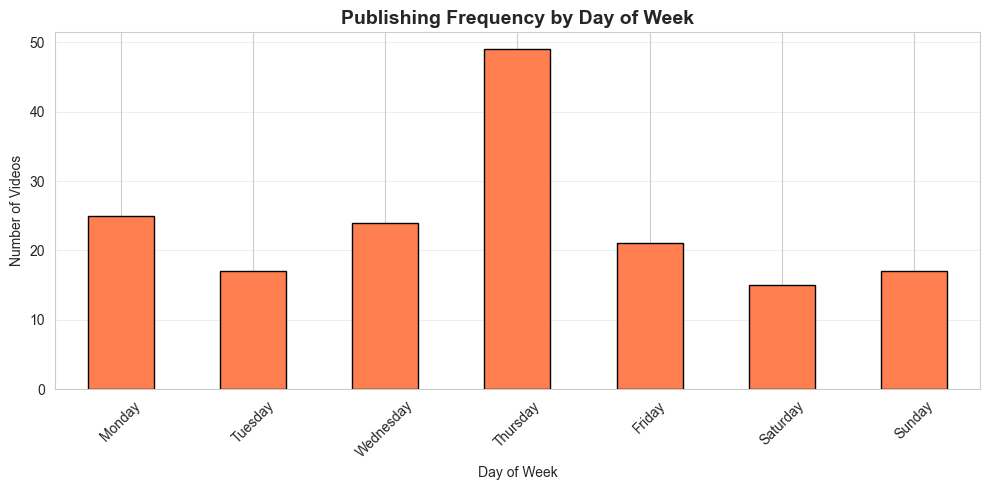


Most common upload day: Thursday (49 videos)


In [17]:
# Day of week analysis
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df['day_of_week'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
day_counts.plot(kind='bar', color='coral', edgecolor='black')
plt.title('Publishing Frequency by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day of Week')
plt.ylabel('Number of Videos')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('04_day_of_week.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 04_day_of_week.png")
plt.show()

print(f"\nMost common upload day: {day_counts.idxmax()} ({day_counts.max()} videos)")


[STEP 8] Date Distribution Analysis

Time Between Uploads (days):


count    167.000000
mean       8.982036
std       24.950909
min        0.000000
25%        0.000000
50%        1.000000
75%        4.500000
max      160.000000
Name: days_since_last, dtype: float64

✓ Saved: 05_upload_gaps.png


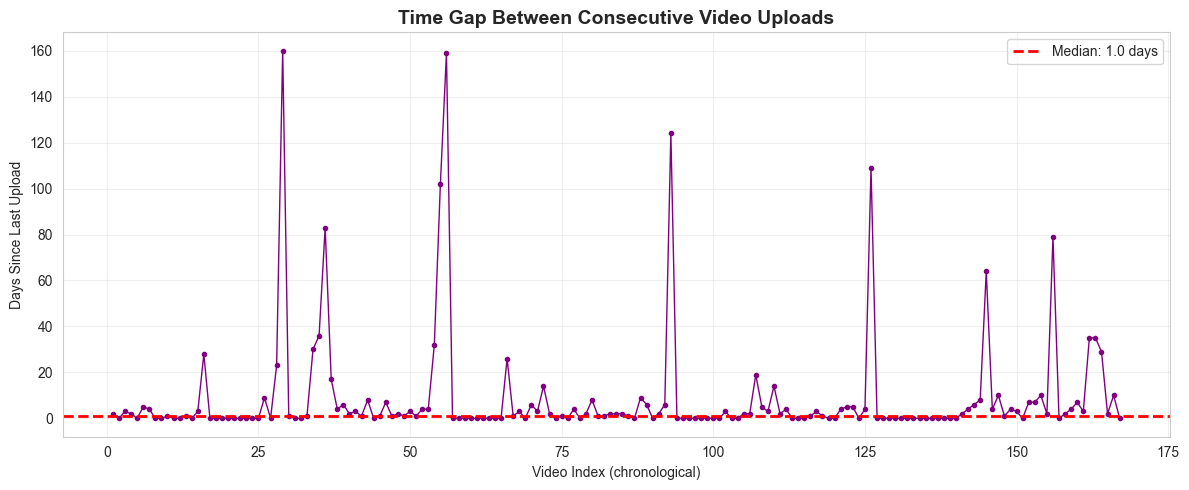

In [18]:
print("\n" + "="*60)
print("[STEP 8] Date Distribution Analysis")
print("="*60)

# Calculate time gaps between uploads
df_sorted = df.sort_values('published_date').reset_index(drop=True)
df_sorted['days_since_last'] = df_sorted['published_date'].diff().dt.days

print("\nTime Between Uploads (days):")
display(df_sorted['days_since_last'].describe())

# Visualize gaps
plt.figure(figsize=(12, 5))
plt.plot(df_sorted.index[1:], df_sorted['days_since_last'][1:], marker='o', markersize=3, linewidth=1, color='purple')
plt.axhline(df_sorted['days_since_last'].median(), color='red', linestyle='--', linewidth=2, label=f'Median: {df_sorted["days_since_last"].median():.1f} days')
plt.title('Time Gap Between Consecutive Video Uploads', fontsize=14, fontweight='bold')
plt.xlabel('Video Index (chronological)')
plt.ylabel('Days Since Last Upload')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('05_upload_gaps.png', dpi=300, bbox_inches='tight')
print("✓ Saved: 05_upload_gaps.png")
plt.show()

In [22]:
print("\n" + "="*60)
print("[STEP 9] Data Cleaning & Preparation")
print("="*60)

# Create cleaned dataset
df_cleaned = df[['video_id', 'title', 'published_date']].copy()

# Remove duplicates if any
initial_count = len(df_cleaned)
df_cleaned = df_cleaned.drop_duplicates(subset=['video_id'])
removed_count = initial_count - len(df_cleaned)

if removed_count > 0:
    print(f"✓ Removed {removed_count} duplicate video_id(s)")
else:
    print("✓ No duplicates to remove")

# Handle missing values (if any)
if df_cleaned.isnull().sum().sum() > 0:
    print(f"\n⚠ Handling {df_cleaned.isnull().sum().sum()} missing values...")
    df_cleaned = df_cleaned.dropna()
    print(f"✓ Removed rows with missing values")
else:
    print("✓ No missing values to handle")

# Sort by date
df_cleaned = df_cleaned.sort_values('published_date').reset_index(drop=True)

print(f"\nFinal cleaned dataset:")
print(f"  Rows: {len(df_cleaned)}")
print(f"  Columns: {len(df_cleaned.columns)}")
print(f"  Memory usage: {df_cleaned.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Save cleaned dataset
df_cleaned.to_csv('C:\\projects\\NEW AI QUERY TUBE\\AI-QueryTube\\data\\processed\\youtube_metadata_cleaned.csv', index=False)
print("\n✓ Saved cleaned dataset: 'youtube_metadata_cleaned.csv'")

# Also save with additional features for reference
df_full = df[['video_id', 'title', 'published_date', 'title_length', 'word_count', 'year', 'month']].copy()
df_full.to_csv('C:\\projects\\NEW AI QUERY TUBE\\AI-QueryTube\\data\\processed\\youtube_metadata_with_features.csv', index=False)
print("✓ Saved extended dataset: 'youtube_metadata_with_features.csv'")

print("\nPreview of cleaned dataset:")
display(df_cleaned.head())


[STEP 9] Data Cleaning & Preparation
✓ No duplicates to remove
✓ No missing values to handle

Final cleaned dataset:
  Rows: 168
  Columns: 3
  Memory usage: 47.39 KB

✓ Saved cleaned dataset: 'youtube_metadata_cleaned.csv'
✓ Saved extended dataset: 'youtube_metadata_with_features.csv'

Preview of cleaned dataset:


,video_id,title,published_date
0,Vtckgz38QHs,Learn Quick Sort in 13 minutes ⚡,2021-08-13 14:11:31+00:00
1,iLZOL-hmr7M,C format specifiers 🔧,2021-08-15 15:27:58+00:00
2,Hh_se2Zqsdk,Learn HTML images in 3 minutes 📷,2021-08-15 15:28:16+00:00
3,9E3I1URu6fc,C arithmetic operators ➗,2021-08-19 15:00:33+00:00
4,SZfoOAv9tEo,Learn HTML text formatting in 2 minutes 💬,2021-08-21 15:06:21+00:00


In [21]:
print("\n" + "="*60)
print("[STEP 10] FINAL SUMMARY")
print("="*60)

print("\n📊 EDA COMPLETE - Key Findings:")
print("-" * 60)
print(f"✓ Total videos analyzed: {len(df_cleaned)}")
print(f"✓ Date range: {df_cleaned['published_date'].min().date()} to {df_cleaned['published_date'].max().date()}")
print(f"✓ Average title length: {df['title_length'].mean():.1f} characters")
print(f"✓ Average words per title: {df['word_count'].mean():.1f} words")
print(f"✓ Most active year: {videos_per_year.loc[videos_per_year['video_count'].idxmax(), 'year']}")
print(f"✓ Average upload frequency: {videos_per_month['video_count'].mean():.2f} videos/month")
print(f"✓ Data quality: {'Excellent - No issues found' if df.isnull().sum().sum() == 0 and duplicate_rows == 0 else 'Good - Minor issues resolved'}")

print("\n" + "="*60)
print("MODULE 2 COMPLETED SUCCESSFULLY! ✅")
print("="*60)
print("\nFiles Generated:")
print("  1. 01_missing_values.png")
print("  2. 02_title_distribution.png")
print("  3. 03_publish_frequency.png")
print("  4. 04_day_of_week.png")
print("  5. 05_upload_gaps.png")
print("  6. youtube_metadata_cleaned.csv")
print("  7. youtube_metadata_with_features.csv")

print("\nNext Steps:")
print("  → Review all visualizations")
print("  → Document observations in markdown cells")
print("  → Proceed to Module 3: Transcript Extraction")
print("  → Use 'youtube_metadata_cleaned.csv' for subsequent modules")
print("="*60)


[STEP 10] FINAL SUMMARY

📊 EDA COMPLETE - Key Findings:
------------------------------------------------------------
✓ Total videos analyzed: 168
✓ Date range: 2021-08-13 to 2025-11-21
✓ Average title length: 36.3 characters
✓ Average words per title: 6.6 words
✓ Most active year: 2024
✓ Average upload frequency: 6.00 videos/month
✓ Data quality: Excellent - No issues found

MODULE 2 COMPLETED SUCCESSFULLY! ✅

Files Generated:
  1. 01_missing_values.png
  2. 02_title_distribution.png
  3. 03_publish_frequency.png
  4. 04_day_of_week.png
  5. 05_upload_gaps.png
  6. youtube_metadata_cleaned.csv
  7. youtube_metadata_with_features.csv

Next Steps:
  → Review all visualizations
  → Document observations in markdown cells
  → Proceed to Module 3: Transcript Extraction
  → Use 'youtube_metadata_cleaned.csv' for subsequent modules
